<a href="https://colab.research.google.com/github/Suchirapon/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive #เชื่อมต่อ google.colab กับ drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os #ทำงานเกี่ยวกับการจัดการไฟล์ 
path = '/content/drive/My Drive/dataviz_2021_data'

In [3]:
search_df = os.path.join(path,'search_request.csv')

In [4]:
data = pd.read_csv(search_df) 
data.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534


# เตรียมข้อมูล

### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [5]:
from datetime import datetime,time

In [6]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

# Bar Chart (กราฟแท่ง)

### สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ web Wongnai.com เพื่อคนหาร้านอาหาร ในแต่ละวัน 

quiz 6

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime,time

<BarContainer object of 7 artists>

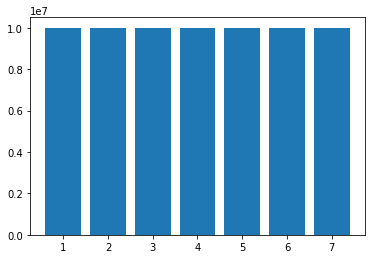

In [14]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek >= 0].iloc[:,2].count()])

<BarContainer object of 7 artists>

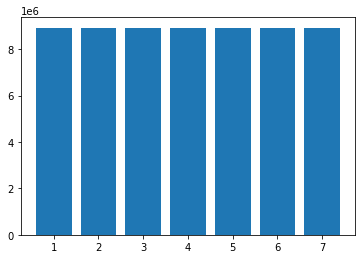

In [15]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek >= 1].iloc[:,2].count()])